In [1]:
%matplotlib notebook

In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle('./df_prdf_zro2.pkl')
df

structure  \
0     [[1.39842671 2.40664143 4.37446042] Zr, [3.615...   
1     [[1.41037568 2.41800359 4.39765312] Zr, [3.632...   
2     [[-8.63451586 -8.02576822 -6.33664411] Zr, [-6...   
3     [[ 1.30468543 -7.65082882  3.77109169] Zr, [ 3...   
4     [[1.38880269 2.40992106 4.37773968] Zr, [3.657...   
...                                                 ...   
1720  [[-8.87001828 -5.13740927 -8.87001828] Zr, [-8...   
1721  [[  1.25503143 -10.19349096  -3.47224897] Zr, ...   
1722  [[ -8.73042916 -10.14298992   2.09308249] Zr, ...   
1723  [[-8.87228424  9.95995753 -4.04166983] Zr, [-8...   
1724  [[1.2716803  9.96087029 1.28860667] Zr, [1.271...   

                                name  Zr-Zr PRDF r=0.00-0.50  \
0        Ag_ZrO2_cat_3.125_222_m.cif                     0.0   
1        Ag_ZrO2_cat_3.125_222_o.cif                     0.0   
2      Ag_ZrO2_cat_3.125_222_p-o.cif                     0.0   
3        Ag_ZrO2_cat_3.125_222_t.cif                     0.0   
4         Ag_ZrO2_cat_6.25_122_m.cif                     0.0   
...                              ...                     ...   
1720    Zr_ZrO2_inter_6.25_212_t.cif                     0.0   
1721    Zr_ZrO2_inter_6.25_221_m.cif                     0.0   
1722    Zr_ZrO2_inter_6.25_221_o.cif                     0.0   
1723  Zr_ZrO2_inter_6.25_221_p-o.cif                     0.0   
1724    Zr_ZrO2_inter_6.25_221_t.cif                     0.0   

      Zr-Zr PRDF r=0.50-1.00  Zr-Zr PRDF r=1.00-1.50  Zr-Zr PRDF r=1.50-2.00  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   
...                      ...                     ...                     ...   
1720                     0.0                     0.0                     0.0   
1721                     0.0                     0.0                     0.0   
1722                     0.0                     0.0                     0.0   
1723                     0.0                     0.0                     0.0   
1724                     0.0                     0.0                     0.0   

      Zr-Zr PRDF r=2.00-2.50  Zr-Zr PRDF r=2.50-3.00  Zr-Zr PRDF r=3.00-3.50  \
0                        0.0                0.000000                0.088289   
1                        0.0                0.000000                0.097991   
2                        0.0                0.000000                0.074706   
3                        0.0                0.000000                0.001940   
4                        0.0                0.000000                0.086219   
...                      ...                     ...                     ...   
1720                     0.0                0.014815                0.028307   
1721                     0.0                0.009876                0.076076   
1722                     0.0                0.012346                0.081384   
1723                     0.0                0.014815                0.028307   
1724                     0.0                0.014815                0.028307   

      Zr-Zr PRDF r=3.50-4.00  ...  O-O PRDF r=15.00-15.50  \
0                   0.042287  ...                0.061330   
1                   0.041558  ...                0.062549   
2                   0.075097  ...                0.066505   
3                   0.129779  ...                0.073647   
4                   0.040683  ...                0.061586   
...                      ...  ...                     ...   
1720                0.106362  ...                0.068600   
1721                0.041215  ...                0.057951   
1722                0.038556  ...                0.057566   
1723                0.106362  ...   

In [4]:
labels_true = pd.read_pickle('./data_labels/labels_zro2.pkl')
labels_true['labels_0_4'] = labels_true['labels_0_4'].replace({'m': 0,
                                                        'p-o': 1,
                                                        'o': 2,
                                                        't': 3,
                                                        'unknown': 4})

y_true = labels_true['labels_0_4']


In [6]:
from sklearn.utils import shuffle
X = df.iloc[:,2:]
# X, y_true = shuffle(X, y_true, random_state=0)
X

Zr-Zr PRDF r=0.00-0.50  Zr-Zr PRDF r=0.50-1.00  Zr-Zr PRDF r=1.00-1.50  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   
...                      ...                     ...                     ...   
1720                     0.0                     0.0                     0.0   
1721                     0.0                     0.0                     0.0   
1722                     0.0                     0.0                     0.0   
1723                     0.0                     0.0                     0.0   
1724                     0.0                     0.0                     0.0   

      Zr-Zr PRDF r=1.50-2.00  Zr-Zr PRDF r=2.00-2.50  Zr-Zr PRDF r=2.50-3.00  \
0                        0.0                     0.0                0.000000   
1                        0.0                     0.0                0.000000   
2                        0.0                     0.0                0.000000   
3                        0.0                     0.0                0.000000   
4                        0.0                     0.0                0.000000   
...                      ...                     ...                     ...   
1720                     0.0                     0.0                0.014815   
1721                     0.0                     0.0                0.009876   
1722                     0.0                     0.0                0.012346   
1723                     0.0                     0.0                0.014815   
1724                     0.0                     0.0                0.014815   

      Zr-Zr PRDF r=3.00-3.50  Zr-Zr PRDF r=3.50-4.00  Zr-Zr PRDF r=4.00-4.50  \
0                   0.088289                0.042287                0.013060   
1                   0.097991                0.041558                0.005110   
2                   0.074706                0.075097                0.000000   
3                   0.001940                0.129779                0.000000   
4                   0.086219                0.040683                0.011735   
...                      ...                     ...                     ...   
1720                0.028307                0.106362                0.008283   
1721                0.076076                0.041215                0.021744   
1722                0.081384                0.038556                0.018638   
1723                0.028307                0.106362                0.008283   
1724                0.028307                0.106362                0.008283   

      Zr-Zr PRDF r=4.50-5.00  ...  O-O PRDF r=15.00-15.50  \
0                   0.003637  ...                0.061330   
1                   0.005911  ...                0.062549   
2                   0.005911  ...                0.066505   
3                   0.002728  ...                0.073647   
4                   0.003759  ...                0.061586   
...                      ...  ...                     ...   
1720                0.003316  ...                0.068600   
1721                0.009949  ...                0.057951   
1722                0.009120  ...                0.057566   
1723                0.003316  ...                0.068600   
1724                0.003316  ...                0.068600   

      O-O PRDF r=15.50-16.00  O-O PRDF r=16.00-16.50  O-O PRDF r=16.50-17.00  \
0                   0.056475                0.061001                0.065090   
1                   0.052566                0.065333                0.062023   
2                   0.062730                0.059890                0.060126   
3                   0.050321                0.072094                0.

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.        , 0.        , 0.        , ..., 0.83953168, 0.08736426,
        0.69904648],
       [0.        , 0.        , 0.        , ..., 0.74862259, 0.60019743,
        0.56436234],
       [0.        , 0.        , 0.        , ..., 0.62465565, 0.78529121,
        0.51787843],
       ...,
       [0.        , 0.        , 0.        , ..., 0.70661157, 0.52418559,
        0.37544696],
       [0.        , 0.        , 0.        , ..., 0.35812672, 0.53109576,
        0.82359952],
       [0.        , 0.        , 0.        , ..., 0.35812672, 0.53307009,
        0.82359952]])

In [8]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

<IPython.core.display.Javascript object>


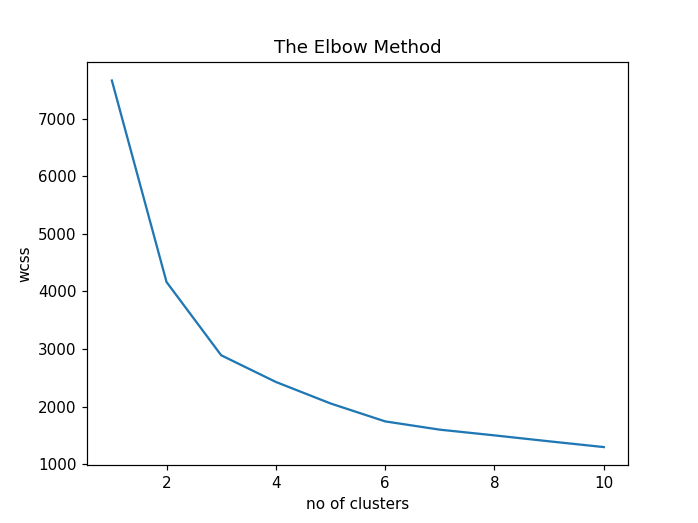

In [9]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [10]:
mPCA = PCA(n_components=50)
PrincipleComponents = mPCA.fit_transform(X)
variance = mPCA.explained_variance_ratio_
variance_ratio = np.cumsum(np.round(variance, decimals=3)*100)
variance_ratio

array([54.6, 67.5, 76.1, 81.3, 84.7, 87.7, 88.9, 89.9, 90.7, 91.4, 92.1,
       92.7, 93.3, 93.8, 94.2, 94.6, 94.9, 95.2, 95.5, 95.8, 96. , 96.2,
       96.4, 96.6, 96.8, 97. , 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8,
       97.9, 98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9,
       99. , 99. , 99. , 99. , 99. , 99. ])

<IPython.core.display.Javascript object>


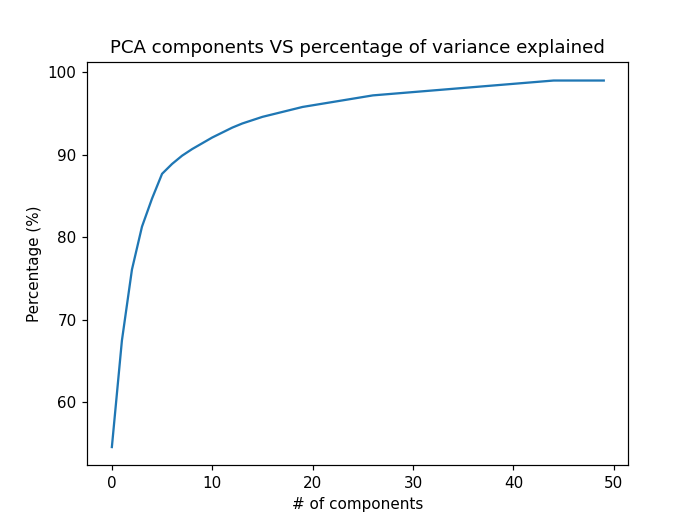

In [11]:
plt.title("PCA components VS percentage of variance explained")
plt.ylabel("Percentage (%)")
plt.xlabel("# of components")
plt.plot(variance_ratio)
plt.show()

In [12]:
pca = PCA(n_components=5)
PCA = pca.fit_transform(X)

In [13]:
kmeans = KMeans(n_clusters=5)
PCA_labels = kmeans.fit_predict(PCA)

In [14]:
from sklearn import metrics
metrics.silhouette_score(X, PCA_labels, metric='l2')

0.3515869359885525

In [15]:
dfPCA = pd.DataFrame(PCA)
dfPCA['cluster'] = PCA_labels
dfPCA['labels'] = y_true
dfPCA.columns = ['x1','x2','x3', 'x4', 'x5','cluster', 'labels']
dfPCA

x1        x2        x3        x4        x5  cluster  labels
0    -1.261982 -0.564522 -0.481926 -0.245990 -0.636215        4       0
1    -1.451127 -0.019428  0.174987  1.087935  0.011573        0       2
2     0.121628  1.598130 -0.486702  0.074837 -0.352141        2       1
3     2.964263 -0.379387 -0.216960  0.153831 -0.014073        1       3
4    -1.234231 -0.464983 -0.421955 -0.273844 -0.521166        4       0
...        ...       ...       ...       ...       ...      ...     ...
1720  2.322898 -0.675071  1.803879 -0.088270 -0.733486        3       3
1721 -1.234626 -0.729947  0.025576 -0.616487  0.211141        4       0
1722 -1.276649 -0.488401  0.250846  0.166984  0.469120        0       2
1723  2.323516 -0.676616  1.800894 -0.088248 -0.732024        3       4
1724  2.321840 -0.672694  1.800473 -0.090519 -0.735788        3       3

[1725 rows x 7 columns]

In [16]:
from sklearn.manifold import TSNE
X1 = dfPCA.iloc[:,:-1]
Xtsne = TSNE(n_components=3).fit_transform(X1)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = PCA_labels
dftsne['labels'] = y_true
dftsne.columns = ['x1','x2', 'x3','cluster', 'labels']
dftsne

x1         x2         x3  cluster  labels
0    -11.160900   7.829855  -0.122591        4       0
1      5.286736  -2.662119  16.477961        0       2
2     11.682303   0.194010  -0.975526        2       1
3     -6.319025   0.628122 -15.952411        1       3
4    -11.188070   4.920854   2.290673        4       0
...         ...        ...        ...      ...     ...
1720   3.934036  14.240413  -2.928959        3       3
1721  -8.443156  -9.041128   6.042737        4       0
1722  -0.663071  11.859586   9.767387        0       2
1723   3.925571  14.240448  -2.927035        3       4
1724   3.932108  14.240017  -2.924116        3       3

[1725 rows x 5 columns]

<IPython.core.display.Javascript object>


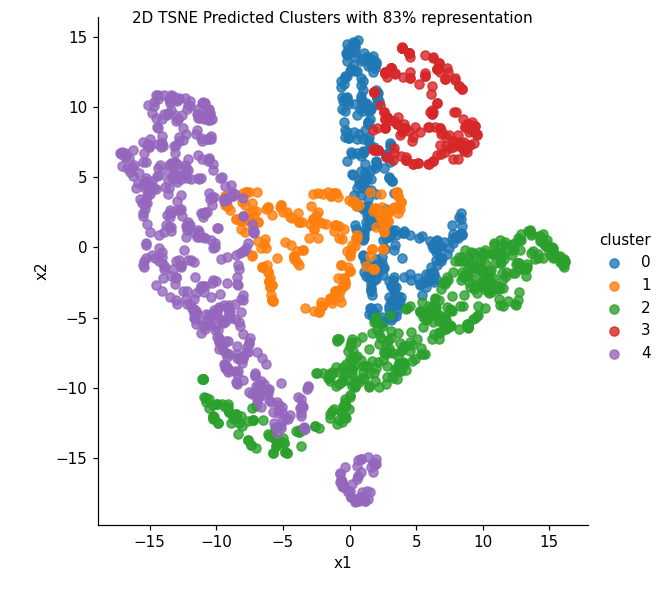

Text(0.5, 0.98, '2D TSNE Predicted Clusters with 83% representation')

In [17]:
dftsne2D = dftsne[['x1', 'x2', 'cluster']]
lm = sns.lmplot(data=dftsne2D, x='x1', y='x2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
fig = lm.fig 
fig.suptitle("2D TSNE Predicted Clusters with 83% representation", fontsize=10)

In [18]:
# dftsne.drop(columns = ['cluster'])
dftsne2D_true = dftsne[['x1', 'x2', 'labels']]

lm = sns.lmplot(data=dftsne2D_true, x='x1', y='x2',hue='labels', fit_reg=False, legend=True, legend_out=True)
fig = lm.fig 
fig.suptitle("2D TSNE Ground Truth with 83% representation", fontsize=11)

<IPython.core.display.Javascript object>

Text(0.5, 0.98, '2D TSNE Ground Truth with 83% representation')

In [19]:
import plotly.express as px
dftsne3D = dftsne[['x1', 'x2', 'x3' ,'cluster']]

fig = px.scatter_3d(
    dftsne3D, x='x1', y='x2', z='x3', color=dftsne3D['cluster'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='TSNE 3D Prediction Kmeans'
)
fig.show()

In [20]:
import plotly.express as px

dftsne3D = dftsne[['x1', 'x2', 'x3' ,'labels']]
dftsne3D['labels'] = dftsne3D['labels'].replace({0: 'm', 1:'p-o', 2:'o', 3: 't', 4: 'unknown'})
fig = px.scatter_3d(
    dftsne3D, x='x1', y='x2', z='x3', color=dftsne3D['labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='TSNE 3D Ground Truth Kmeans'
)
fig.show()

<ipython-input-20-08a8a383d401>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
dfPCA2 = dfPCA[['x1', 'x2', 'cluster']]
lm = sns.lmplot(data=dfPCA2, x='x1', y='x2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Predicted Clusters with 88% representation", fontsize=10)

<IPython.core.display.Javascript object>

Text(0.5, 0.98, '2D PCA Predicted Clusters with 88% representation')

<IPython.core.display.Javascript object>


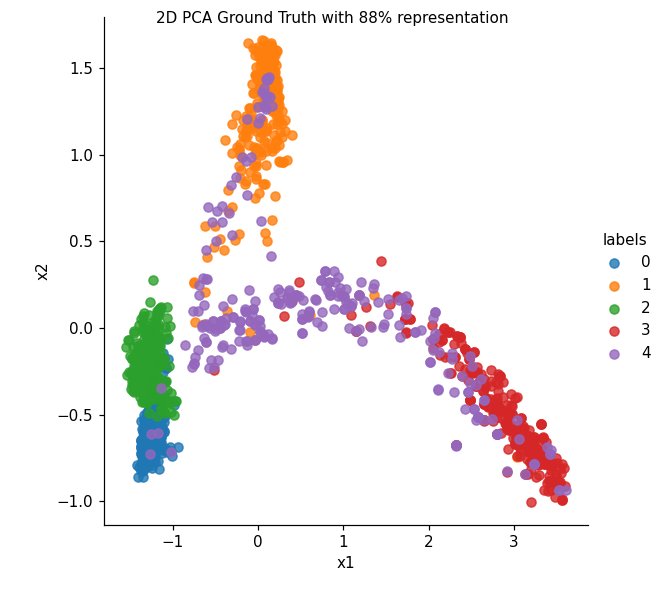

Text(0.5, 0.98, '2D PCA Ground Truth with 88% representation')

In [22]:
dfPCA2_true = dfPCA[['x1', 'x2', 'labels']]
lm = sns.lmplot(data=dfPCA2_true, x='x1', y='x2',hue='labels', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Ground Truth with 88% representation", fontsize=10)

In [23]:
PCA_labels

array([1, 1, 2, ..., 1, 0, 0])

<IPython.core.display.Javascript object>


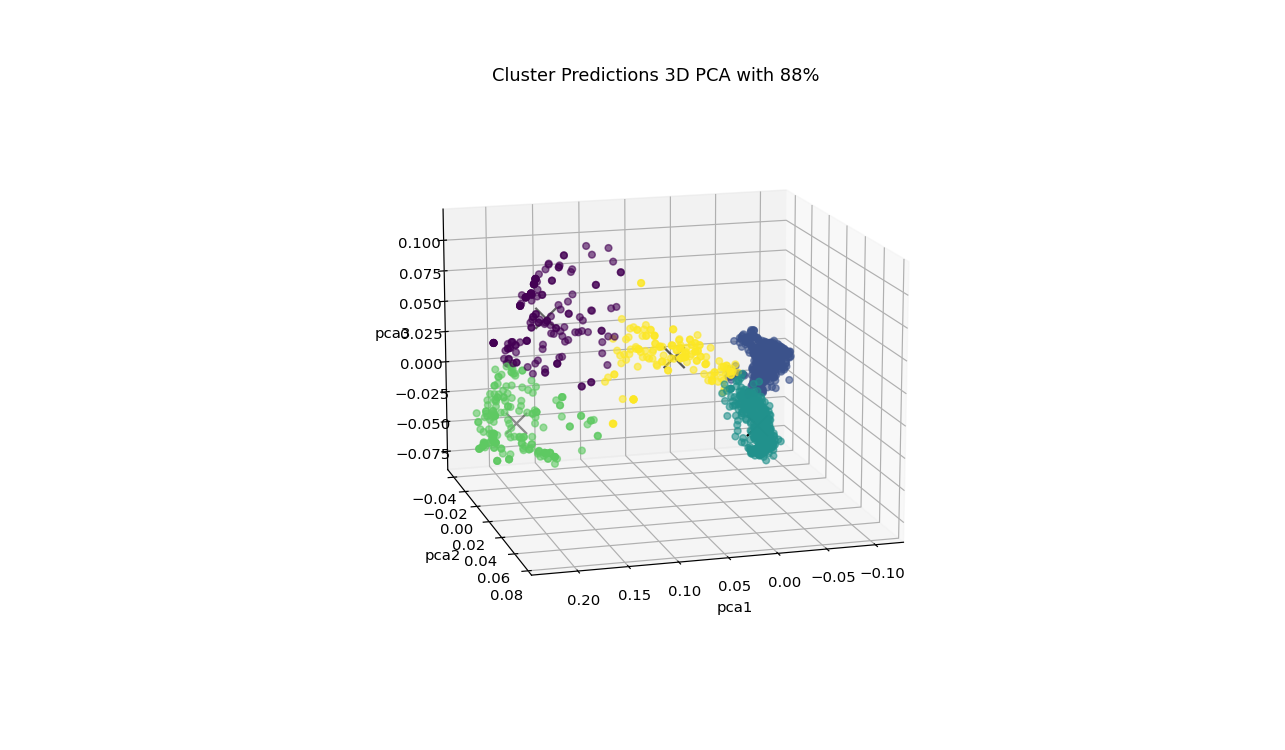

In [24]:
dfPCA3 = dfPCA[['x1', 'x2', 'x3', 'cluster']]
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfPCA3['x1'],dfPCA3['x2'],dfPCA3['x3'], 
            c=PCA_labels, cmap='viridis',
             s=20, alpha = 0.6)

ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
           kmeans.cluster_centers_[:,2], 
           s = 200, c = 'black', marker='x', label = 'Centroid')

ax.set_title("Cluster Predictions 3D PCA with 88% ")
ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")
ax.dist = 10

In [25]:
y_true_arr = y_true.values
y_true_arr

array([0, 2, 1, ..., 2, 4, 3], dtype=int64)

<IPython.core.display.Javascript object>


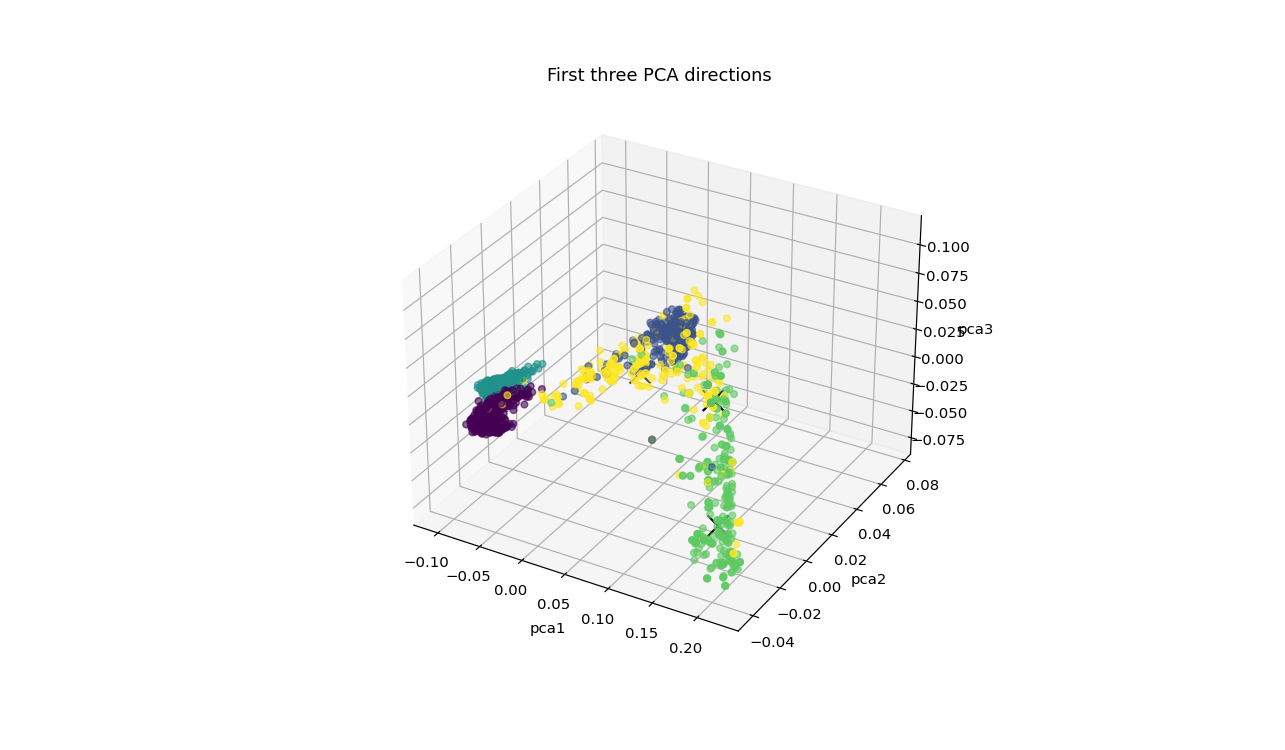

In [26]:
dfPCA3_true = dfPCA[['x1', 'x2', 'x3', 'labels']]
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfPCA3_true['x1'],dfPCA3_true['x2'],dfPCA3_true['x3'], 
            c=dfPCA3_true['labels'], cmap='viridis',
             s=20, alpha = 0.6)

ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
           kmeans.cluster_centers_[:,2], 
           s = 200, c = 'black', marker='x', label = 'Centroid')

ax.set_title("First three PCA directions")
ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")
ax.dist = 10


In [27]:
dfPCA

x1        x2        x3        x4        x5  cluster  labels
0    -0.073376 -0.020693 -0.013795 -0.003419 -0.018476        1       0
1    -0.092024 -0.009084  0.002432 -0.029872  0.018119        1       2
2    -0.000381  0.073203 -0.015978 -0.013823 -0.011511        2       1
3     0.185398 -0.017049 -0.006778 -0.006490  0.002243        3       3
4    -0.075444 -0.019767 -0.015180  0.001605 -0.013196        1       0
...        ...       ...       ...       ...       ...      ...     ...
1720  0.160384 -0.031772  0.073105 -0.028495 -0.030811        0       3
1721 -0.071889 -0.025072  0.003394  0.024432 -0.007224        1       0
1722 -0.076343 -0.020936  0.013715  0.003304  0.008909        1       2
1723  0.160409 -0.031817  0.072965 -0.028460 -0.030752        0       4
1724  0.160377 -0.031720  0.073034 -0.028488 -0.030921        0       3

[1725 rows x 7 columns]

In [23]:

dfPCA['labels'] = dfPCA['labels'].replace({0: 'm', 1:'p-o', 2:'o', 3: 't', 4: 'unknown'})
dfPCA


x1        x2        x3        x4        x5  cluster   labels
0    -1.261982 -0.564522 -0.481926 -0.245990 -0.636215        4        m
1    -1.451127 -0.019428  0.174987  1.087935  0.011573        0        o
2     0.121628  1.598130 -0.486702  0.074837 -0.352141        2      p-o
3     2.964263 -0.379387 -0.216960  0.153831 -0.014073        1        t
4    -1.234231 -0.464983 -0.421955 -0.273844 -0.521166        4        m
...        ...       ...       ...       ...       ...      ...      ...
1720  2.322898 -0.675071  1.803879 -0.088270 -0.733486        3        t
1721 -1.234626 -0.729947  0.025576 -0.616487  0.211141        4        m
1722 -1.276649 -0.488401  0.250846  0.166984  0.469120        0        o
1723  2.323516 -0.676616  1.800894 -0.088248 -0.732024        3  unknown
1724  2.321840 -0.672694  1.800473 -0.090519 -0.735788        3        t

[1725 rows x 7 columns]

In [24]:
fig = px.scatter_3d(
    dfPCA, x='x1', y='x2', z='x3', color=dfPCA['labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Ground Truth'
)
fig.show()

In [25]:
fig = px.scatter_3d(
    dfPCA, x='x1', y='x2', z='x3', color=dfPCA['cluster'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Prediction'
)
fig.show()

In [37]:
from sklearn.cluster import OPTICS
X_optics = dfPCA[['x1', 'x2', 'x3']]

# min_samples = list(range(50, 60))
# for i in min_samples:
    # print('min_samples is: ' + str(i))
    
clustering = OPTICS(min_samples=70).fit(X_optics)
labels_optics = clustering.labels_
dfPCA['labels_optics'] = labels_optics
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_optics)) - (1 if -1 in labels_optics else 0)
n_noise_ = list(labels_optics).count(-1)
unique, counts = np.unique(labels_optics, return_counts=True)
print(dict(zip(unique, counts)))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_optics, labels_optics))



{-1: 183, 0: 828, 1: 389, 2: 325}
Estimated number of clusters: 3
Estimated number of noise points: 183
Silhouette Coefficient: 0.672


In [38]:
dfPCA_optics = dfPCA[['x1', 'x2', 'x3','labels_optics']]

fig = px.scatter_3d(
    dfPCA_optics, x='x1', y='x2', z='x3', color=dfPCA_optics['labels_optics'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Prediction OPTICS'
)
fig.show()